In [1]:
# Task 1.1: Data Retrieving
# Importing pandas, numpy and pyplot packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Importing StarWars.csv dataset and assigning it to a variable using read_csv function
mice_file = 'Data_Cortex_Nuclear.csv' 
mice = pd.read_csv(mice_file, sep=',', decimal = '.')

# the top row contains the response options from the survey 
mice.head(3)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m


In [2]:
mice.shape

(1080, 82)

In [3]:
mice.isna().sum().sum()

1396

In [4]:
mice.dtypes

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object

In [5]:
# For-loop for checking the typos by using unqiue value counts in each column
for i in mice.columns:
    m = mice[i].value_counts(dropna = False)
    print(m)
    print()

3414_11     1
3499_13     1
361_13      1
3534_8      1
3522_1      1
           ..
3504_12     1
50810C_4    1
311_11      1
3412_2      1
3483_13     1
Name: MouseID, Length: 1080, dtype: int64

NaN         3
0.399414    1
0.388473    1
0.599745    1
0.356944    1
           ..
0.429252    1
0.194417    1
0.481273    1
0.229960    1
0.343750    1
Name: DYRK1A_N, Length: 1078, dtype: int64

NaN         3
0.639280    2
0.481460    1
1.025424    1
0.349683    1
           ..
0.572398    1
0.540086    1
0.477591    1
1.051810    1
0.460938    1
Name: ITSN1_N, Length: 1077, dtype: int64

NaN         3
0.302132    1
0.315109    1
0.341103    1
0.331943    1
           ..
0.237249    1
0.288585    1
0.394664    1
0.279554    1
0.294870    1
Name: BDNF_N, Length: 1078, dtype: int64

NaN         3
2.164182    1
1.912610    1
2.704669    1
2.384171    1
           ..
1.936624    1
2.930717    1
2.051009    1
2.425020    1
1.875000    1
Name: NR1_N, Length: 1078, dtype: int64

NaN         3
4.0

In [6]:
# Changing datatypes
# Convert the Genotype variable into Category type
mice.loc[: , 'Genotype'] = mice.loc[: , 'Genotype'].astype('category')
mice['Genotype'].dtype

CategoricalDtype(categories=['Control', 'Ts65Dn'], ordered=False)

In [7]:
# Convert the Treatment variable into Category type
mice.loc[: , 'Treatment'] = mice.loc[: , 'Treatment'].astype('category')
mice['Treatment'].dtype

CategoricalDtype(categories=['Memantine', 'Saline'], ordered=False)

In [8]:
# Convert the Behavior variable into Category type
mice.loc[: , 'Behavior'] = mice.loc[: , 'Behavior'].astype('category')
mice['Behavior'].dtype

CategoricalDtype(categories=['C/S', 'S/C'], ordered=False)

In [9]:
# Convert the class variable into Category type
mice.loc[: , 'class'] = mice.loc[: , 'class'].astype('category')
mice['class'].dtype

CategoricalDtype(categories=['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s',
                  't-SC-m', 't-SC-s'],
                 ordered=False)

In [10]:
# Using mean method to replace missing values
for col in mice.columns[1:78]:
    mice[col].fillna(mice[col].mean(), axis = 0, inplace = True)

In [11]:
mice.isna().sum().sum()

0

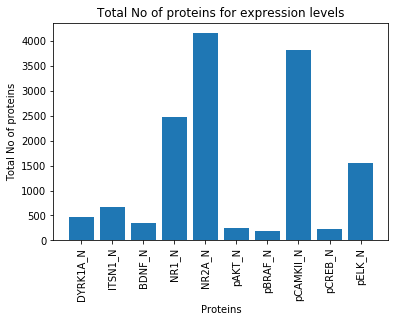

In [12]:
# Task 2.1: Explore the columns
avg = mice[mice.columns[1:11]].sum()
index = mice.columns[1:11]
plt.bar(index, avg)
plt.xlabel('Proteins')
plt.xticks(rotation=90)
plt.ylabel('Total No of proteins')
plt.title('Total No of proteins for expression levels')
plt.show()

In [13]:
mice.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249015,0.251290,0.049314,0.346810,0.931802,0.041577,0.027004,1.293368,0.032542,0.466254,...,0.028989,0.026461,0.023519,0.014276,0.023018,0.066432,0.054222,0.036261,0.048069,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288163,0.473669,0.287650,2.059152,3.160287,0.205821,0.164619,2.479861,0.190828,1.206389,...,0.206395,0.141045,0.119986,0.110839,0.114373,0.398082,0.133969,0.159168,0.174271,1.081423
50%,0.366540,0.566365,0.316703,2.297269,3.763306,0.231246,0.182270,3.329624,0.210681,1.356368,...,0.224000,0.157914,0.134762,0.121626,0.128466,0.448459,0.169609,0.183135,0.205440,1.317441
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197226,4.480652,0.234558,1.560931,...,0.241655,0.167584,0.139331,0.131955,0.142427,0.490773,0.187174,0.196133,0.219242,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [14]:
mice.groupby(by='Genotype')['DYRK1A_N'].describe()

,count,mean,std,min,25%,50%,75%,max
Genotype,,,,,,,,
Control,570.0,0.404756,0.300553,0.145327,0.270523,0.328347,0.440944,2.516367
Ts65Dn,510.0,0.449341,0.171514,0.163325,0.329478,0.408476,0.527983,0.992220


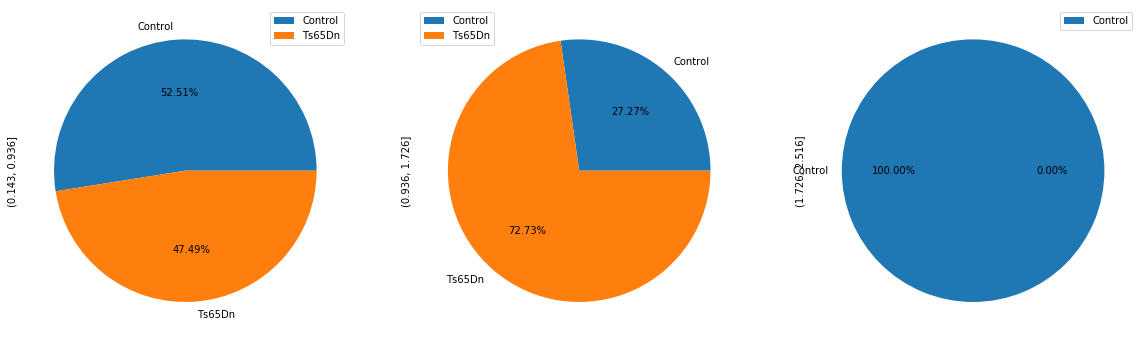

In [15]:
# Task 2.2: Relationships between columns
# As for visualization purpose, converting the first column of protein to category of range values using cut function.
mice1 = mice.copy()
mice['DYRK1A_N'] = pd.cut(mice['DYRK1A_N'], bins=3)
grouped = mice.groupby(['Genotype', 'DYRK1A_N'])['Genotype'].size()
grouped.unstack().plot.pie(subplots=True, figsize=(20, 20), autopct='%.2f%%')
plt.show()

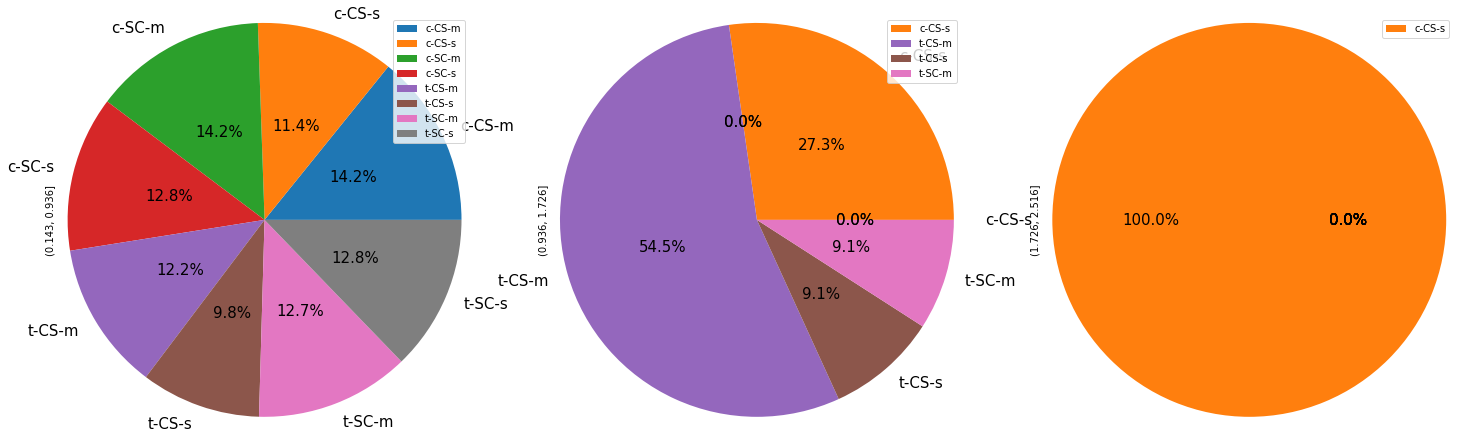

In [16]:
grouped = mice.groupby(['class', 'DYRK1A_N'])['class'].size()
grouped.unstack().plot.pie(subplots=True, radius=1.2, figsize=(25, 20), fontsize = 15, pctdistance=0.5, autopct='%1.1f%%')
plt.show()

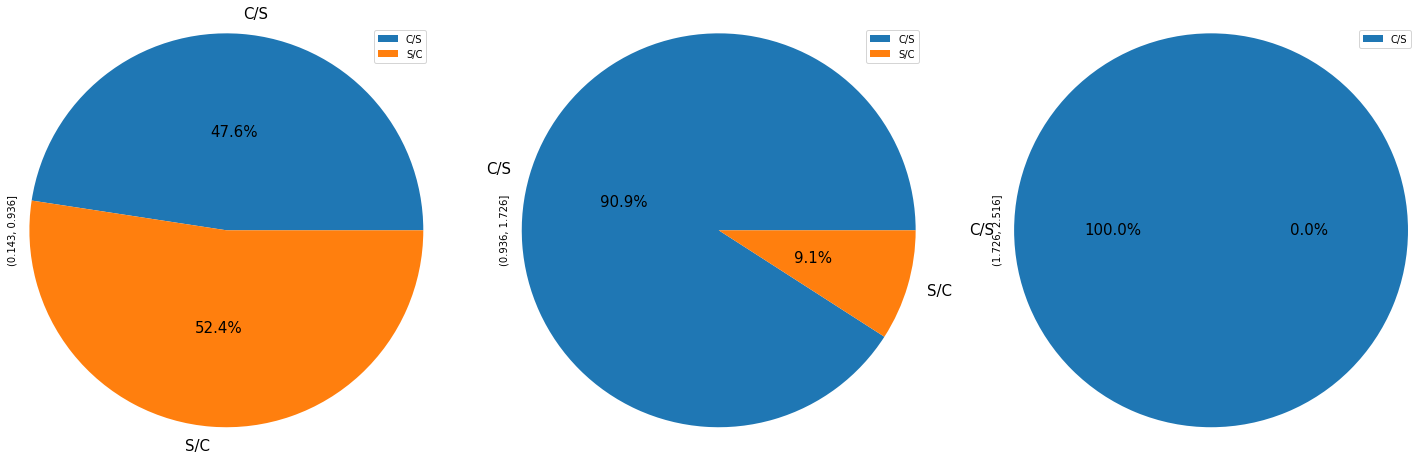

In [17]:
grouped = mice.groupby(['Behavior', 'DYRK1A_N'])['Behavior'].size()
grouped.unstack().plot.pie(subplots=True, radius=1.2, figsize=(25, 20), fontsize = 15, pctdistance=0.5, autopct='%1.1f%%')
plt.show()

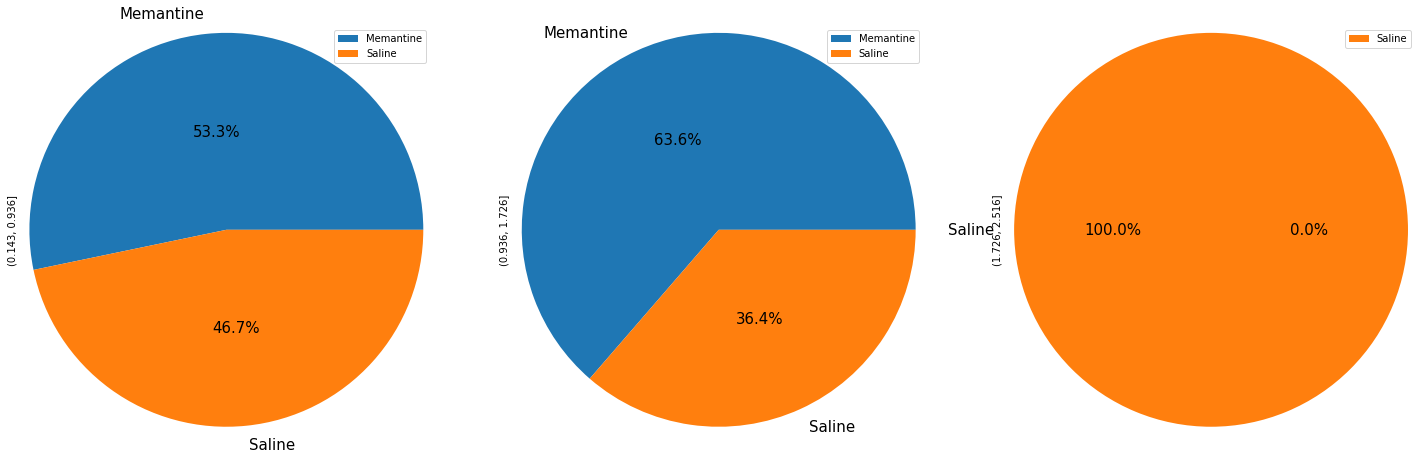

In [18]:
grouped = mice.groupby(['Treatment', 'DYRK1A_N'])['Treatment'].size()
grouped.unstack().plot.pie(subplots=True, radius=1.2, figsize=(25, 20), fontsize = 15, pctdistance=0.5, autopct='%1.1f%%')
plt.show()

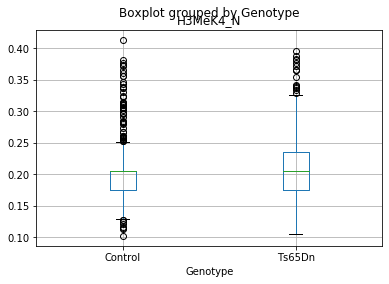

In [19]:
mice.boxplot(column = 'H3MeK4_N', by = 'Genotype')
plt.show()

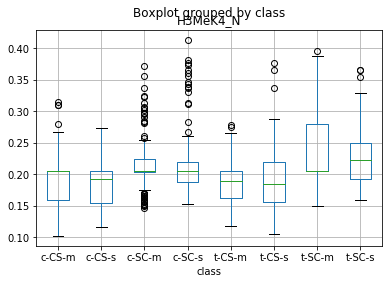

In [20]:
mice.boxplot(column = 'H3MeK4_N', by = 'class')
plt.show()

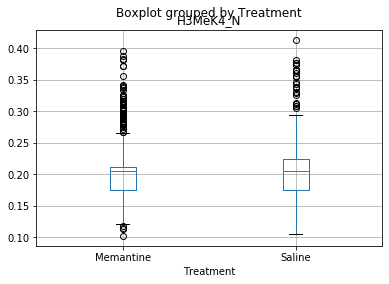

In [21]:
mice.boxplot(column = 'H3MeK4_N', by = 'Treatment')
plt.show()

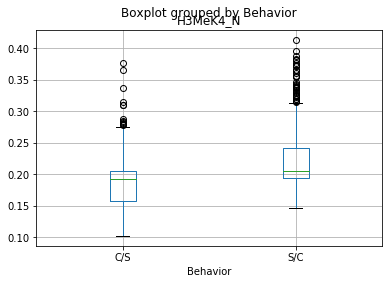

In [22]:
mice.boxplot(column = 'H3MeK4_N', by = 'Behavior')
plt.show()

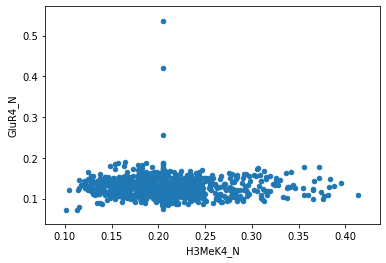

In [23]:
mice.plot.scatter(x='H3MeK4_N', y='GluR4_N')
plt.show()

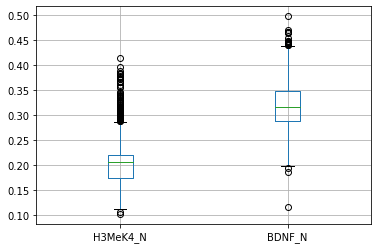

In [24]:
mice.boxplot(column=['H3MeK4_N', 'BDNF_N'])
plt.show()

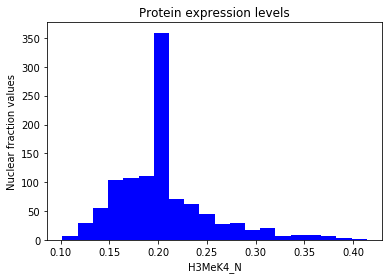

In [25]:
plt.hist(mice['H3MeK4_N'], color = 'blue', bins = 20)
plt.xlabel('H3MeK4_N')
plt.ylabel('Nuclear fraction values')
plt.title('Protein expression levels')
plt.show()

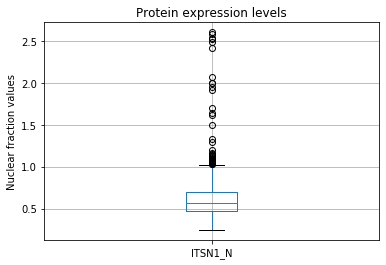

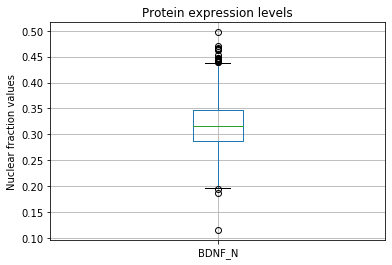

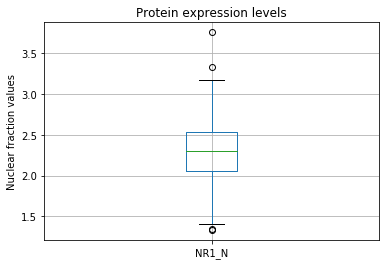

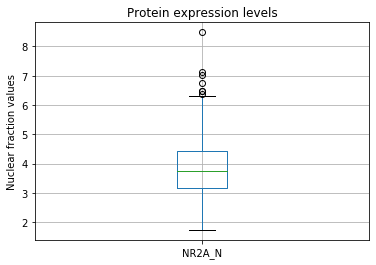

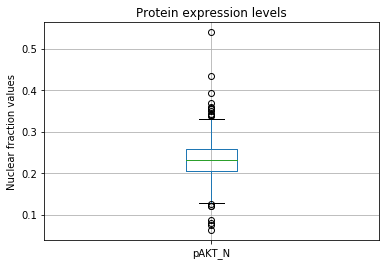

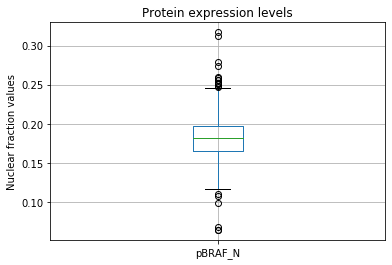

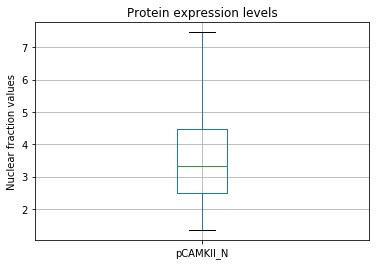

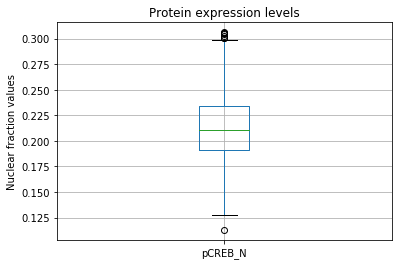

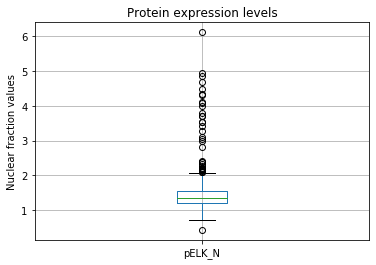

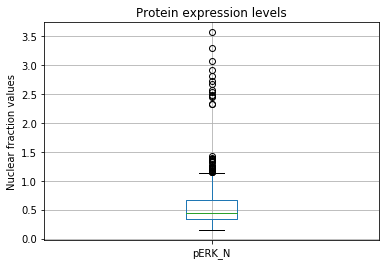

In [26]:
for i in mice.columns[2:12]:
    mice.boxplot(column=i)
    plt.ylabel('Nuclear fraction values')
    plt.title('Protein expression levels')
    plt.show()

In [27]:
# For modelling replacing back the first protein column values to numeric.
mice['DYRK1A_N'] = mice1['DYRK1A_N'].values

In [28]:
# Data Modelling
X_data = mice.loc[:, 'DYRK1A_N':'CaNA_N']
X_data

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.134762,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.134762,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.134762,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.134762,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,0.134762,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,0.134762,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,0.134762,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,0.134762,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


In [29]:
y_data = mice['class']
y_data

0       c-CS-m
1       c-CS-m
2       c-CS-m
3       c-CS-m
4       c-CS-m
         ...  
1075    t-SC-s
1076    t-SC-s
1077    t-SC-s
1078    t-SC-s
1079    t-SC-s
Name: class, Length: 1080, dtype: category
Categories (8, object): [c-CS-m, c-CS-s, c-SC-m, c-SC-s, t-CS-m, t-CS-s, t-SC-m, t-SC-s]

In [30]:
# 30 % for testing will give a better indication of the models performance on unseen data.
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = .3, random_state = 2)
print(X_train.shape)
print(X_train[:5])

(756, 77)
     DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
62   0.395358  0.576313  0.342568  2.356046  5.326220  0.207413  0.168601   
863  0.617112  0.687791  0.292148  2.113193  3.393251  0.237013  0.176033   
780  0.333636  0.602178  0.324040  2.834414  5.132132  0.242998  0.179461   
291  0.266736  0.445252  0.281439  2.186127  3.363951  0.237156  0.181111   
845  0.474593  0.702149  0.326170  2.174734  3.998393  0.276762  0.198634   

     pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N    BCL2_N  \
62    3.511544  0.181580  1.416199  ...  0.238161  0.157914  0.133049   
863   4.108277  0.232895  1.221071  ...  0.223820  0.160849  0.134713   
780   6.358402  0.216286  1.278268  ...  0.223717  0.134261  0.120728   
291   4.167099  0.198236  1.179381  ...  0.184071  0.155141  0.134762   
845   2.705965  0.198835  1.695120  ...  0.206222  0.187507  0.149720   

        pS6_N   pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  
62   0.1347

In [31]:
print(y_train.shape)
print(y_train[:5])

(756,)
62     c-CS-m
863    t-CS-s
780    t-SC-m
291    c-SC-m
845    t-CS-s
Name: class, dtype: category
Categories (8, object): [c-CS-m, c-CS-s, c-SC-m, c-SC-s, t-CS-m, t-CS-s, t-SC-m, t-SC-s]


In [32]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# creating odd list of K for KNN
neighbors = list(range(1, 9, 2))

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    print("K score for " +str(k)+ " is " +str(scores.mean()))
    print()

K score for 1 is 0.9853649248079627

K score for 3 is 0.9353041176522188

K score for 5 is 0.9101064413975808

K score for 7 is 0.8892472959814732



In [33]:
# K=1 could result in 100% accuracy or overfitting
# A small k results in predictions with high variance and low bias.
# So, k=5 would be the value for KNeighbors
clf = KNeighborsClassifier(5)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.73      0.97      0.83        33
      c-CS-s       0.94      0.80      0.87        41
      c-SC-m       0.90      0.90      0.90        52
      c-SC-s       0.98      1.00      0.99        47
      t-CS-m       0.96      0.74      0.84        35
      t-CS-s       0.87      0.87      0.87        31
      t-SC-m       0.86      0.93      0.89        41
      t-SC-s       0.93      0.91      0.92        44

    accuracy                           0.90       324
   macro avg       0.90      0.89      0.89       324
weighted avg       0.90      0.90      0.90       324



In [34]:
cm = confusion_matrix(y_test, y_pre)
cm

array([[32,  1,  0,  0,  0,  0,  0,  0],
       [ 5, 33,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  5,  0],
       [ 0,  0,  0, 47,  0,  0,  0,  0],
       [ 5,  0,  0,  0, 26,  1,  0,  3],
       [ 2,  1,  0,  0,  1, 27,  0,  0],
       [ 0,  0,  2,  1,  0,  0, 38,  0],
       [ 0,  0,  3,  0,  0,  0,  1, 40]], dtype=int64)

In [35]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = .3, random_state = 2)

# perform 10-fold cross validation
for i in range(10, 25, 5):
    dt = DecisionTreeClassifier(max_depth = i, min_samples_split = i, min_samples_leaf = i)
    scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
    print("score for " +str(i)+ " " +str(i)+ " " +str(i)+ " is " +str(scores.mean()))
    print()

score for 10 10 10 is 0.7383127933191225

score for 15 15 15 is 0.709597436774652

score for 20 20 20 is 0.6986319756952668



In [36]:
# As we can see changing the parameters doesnt give a good accuracy score
# Parameters with default value gived the best accuracy score 
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.76      0.85      0.80        33
      c-CS-s       0.79      0.73      0.76        41
      c-SC-m       0.86      0.81      0.83        52
      c-SC-s       0.84      0.77      0.80        47
      t-CS-m       0.77      0.77      0.77        35
      t-CS-s       0.81      0.81      0.81        31
      t-SC-m       0.85      0.95      0.90        41
      t-SC-s       0.91      0.93      0.92        44

    accuracy                           0.83       324
   macro avg       0.82      0.83      0.82       324
weighted avg       0.83      0.83      0.83       324



In [37]:
cm = confusion_matrix(y_test, y_pre)
cm

array([[28,  2,  0,  0,  3,  0,  0,  0],
       [ 7, 30,  0,  0,  2,  2,  0,  0],
       [ 1,  0, 42,  5,  0,  0,  4,  0],
       [ 0,  0,  5, 36,  0,  0,  3,  3],
       [ 1,  3,  0,  0, 27,  4,  0,  0],
       [ 0,  3,  0,  0,  3, 25,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 39,  1],
       [ 0,  0,  1,  2,  0,  0,  0, 41]], dtype=int64)

KNN: 0.899509 (0.026974)
DT: 0.826667 (0.045324)


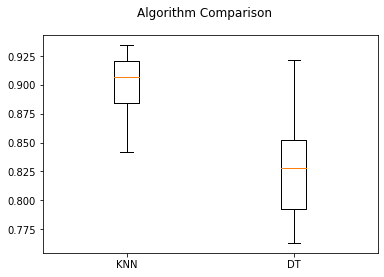

In [38]:
# Comparison
seed = 2
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier(5)))
models.append(('DT', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_score = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_score)
    names.append(name)
    scores = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
    print(scores)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()